In [13]:
%load_ext autoreload
%autoreload 2
import oogeso
import oogeso.io
import oogeso.plotting_utils.plots as plots
import json
import IPython.display
import ipywidgets
import pprint
import logging
logging.basicConfig(level="INFO",format="%(asctime)s %(levelname)s [%(name)s.%(funcName)s:%(lineno)d] %(message)s")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
energy_system = oogeso.io.read_data_from_yaml("../tests/testdata1.yaml")

In [6]:
simulator = oogeso.Simulator(data=energy_system)

2021-10-21 15:35:01,435 INFO [oogeso.core.optimiser.__init__:47] profiles in use: []
2021-10-21 15:35:01,439 INFO [oogeso.core.optimiser._specify_objective:353] Using objective function: penalty


In [7]:
yy=[""]+list(simulator.optimiser.pyomo_instance.component_objects(oogeso.optimiser.pyo.Constraint, active=True))
@ipywidgets.interact(constraint=yy)
def showdata(constraint):
    pprint.pprint(constraint.pprint(),width=1) if constraint!="" else print("")

interactive(children=(Dropdown(description='constraint', options=('', <pyomo.core.base.constraint.IndexedConst…

In [8]:
energy_system.parameters.optimisation_return_data= None

In [9]:
# Active objective(s):
for ob in simulator.optimiser.pyomo_instance.component_objects(oogeso.optimiser.pyo.Objective, active=True): 
    ob.pprint()

objObjective : Size=1, Index=None, Active=True
    Key  : Active : Sense    : Expression
    None :   True : minimize : (varDevicePenalty[source1,el,out,0] + varDevicePenalty[source1,el,out,1])/2


In [10]:
res = simulator.runSimulation(solver="cbc",timerange=[0,4])

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:02<00:00,  1.95it/s]


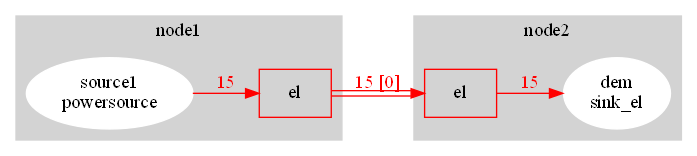

In [14]:
IPython.display.Image(plots.plotNetwork(simulator,timestep=1).create_png())

In [53]:
res_str=oogeso.dto.serialisation.serialize_oogeso_data(res)
with open("testresult.json","w") as f:
    f.write(res_str)

In [59]:
res2=oogeso.dto.serialisation.deserialize_oogeso_results(res_str)

dfDeviceFlow
<class 'str'> <class 'dict'>
dfDeviceIsPrep
<class 'str'> <class 'dict'>
dfDeviceIsOn
<class 'str'> <class 'dict'>
dfDeviceStarting
<class 'str'> <class 'dict'>
dfDeviceStopping
<class 'str'> <class 'dict'>
dfDeviceStorageEnergy
<class 'str'> <class 'dict'>
dfDeviceStoragePmax
<class 'str'> <class 'dict'>
dfPenalty
<class 'str'> <class 'dict'>
dfEdgeFlow
<class 'str'> <class 'dict'>
dfEdgeLoss
<class 'str'> <class 'dict'>
dfElVoltageAngle
<class 'str'> <class 'dict'>
dfTerminalPressure
<class 'str'> <class 'dict'>
dfTerminalFlow
<class 'str'> <class 'dict'>
dfCO2rate
<class 'str'> <class 'dict'>
dfCO2rate_per_dev
<class 'str'> <class 'dict'>
dfExportRevenue
<class 'str'> <class 'dict'>
dfCO2intensity
<class 'str'> <class 'dict'>
dfElReserve
<class 'str'> <class 'dict'>
dfElBackup
<class 'str'> <class 'dict'>
dfDuals
df_profiles_forecast
<class 'str'> <class 'dict'>
df_profiles_nowcast
<class 'str'> <class 'dict'>


In [64]:
res.dfEdgeFlow

edge  time
el1   0       15.0
      1       15.0
      2       15.0
      3       15.0
Name: value, dtype: float64

In [51]:
res_dct=json.loads(res_str)
import pandas as pd
df=pd.DataFrame.from_dict(res_dct["dfDeviceFlow"])
ind=[c for c in df.columns if c!="value"]
df.set_index(ind)

value
device  carrier terminal time       
dem     el      in       0      15.0
                         1      15.0
                         2      15.0
                         3      15.0
                out      0       0.0
                         1       0.0
                         2       0.0
                         3       0.0
source1 el      in       0       0.0
                         1       0.0
                         2       0.0
                         3       0.0
                out      0      15.0
                         1      15.0
                         2      15.0
                         3      15.0

In [15]:
oogeso.plots.plot_SumPowerMix(res,"el")

AttributeError: 'SimulationResult' object has no attribute 'optimiser'

In [66]:
for x in [a for a in dir(res) if a.startswith('df')]:
    df=getattr(res,x)
    if df is not None:
        print(x, df.index.names, type(df))
    else:
        print(x, "-")

dfCO2intensity [None] <class 'pandas.core.series.Series'>
dfCO2rate [None] <class 'pandas.core.series.Series'>
dfCO2rate_per_dev [None] <class 'pandas.core.frame.DataFrame'>
dfDeviceFlow ['device', 'carrier', 'terminal', 'time'] <class 'pandas.core.series.Series'>
dfDeviceIsOn ['device', 'time'] <class 'pandas.core.series.Series'>
dfDeviceIsPrep ['device', 'time'] <class 'pandas.core.series.Series'>
dfDeviceStarting ['device', 'time'] <class 'pandas.core.series.Series'>
dfDeviceStopping ['device', 'time'] <class 'pandas.core.series.Series'>
dfDeviceStorageEnergy ['device', 'time'] <class 'pandas.core.series.Series'>
dfDeviceStoragePmax ['device', 'time'] <class 'pandas.core.series.Series'>
dfDuals -
dfEdgeFlow ['edge', 'time'] <class 'pandas.core.series.Series'>
dfEdgeLoss ['edge', 'time'] <class 'pandas.core.series.Series'>
dfElBackup [None] <class 'pandas.core.frame.DataFrame'>
dfElReserve [None] <class 'pandas.core.frame.DataFrame'>
dfElVoltageAngle ['node', 'time'] <class 'pandas.c

In [67]:
res.dfCO2rate_per_dev

,source1,dem
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0


In [70]:
res2.dfCO2rate_per_dev

,,
index,source1,dem
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
